# Multivariate Taylor expansion

Let's expand a function $f(x,y)$.

* [Taylor series](https://en.wikipedia.org/wiki/Taylor_series)

## First order approximation

Expand $f(x,y)$ around $(a_1,a_2)$

$$
f(x,y) \approx g(x, y) = f(a_1,a_2) + \nabla f(a_1,a_2)^T (x-a_1, y-a_2) 
$$

where $(x,y)$ is neighborhood of $a$.

For example,
$(x,y) = (a_1+\Delta x, a_2 + \Delta y )$

$$
g(x,y) \approx f(a_1, a_2)  + \nabla f(\Delta x, \Delta y)^T (\Delta x, \Delta y) 
$$

## Second order approximation

$$
g(x, y) \approx f(a_1,a_2) + \nabla f(a_1,a_2)^T (x-a_1, y-a_2) + \frac{1}{2} (x-a_1,y-a_2)^T H(a_1,a_2) (x-a_1,y-a_2) \\
$$


where $(x,y)$ is neighborhood of $a$, $H(a_1, a_2)$ is a Hessian of f evaluated at $(a_1, a_2)$

## Example:

$$
f(x,y) = x^3 + x^2 y^2 + y^3
$$

Consider the Taylor expansion of $f$ around $a = (2, 3)$.

## First Order approximation

The first order approximation is given by:

$$
\begin{aligned}
g(x,y) & = f(2,3) + \nabla f(2,3)^T \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix} \\
& = 71 + \begin{pmatrix} 48 \\ 51 \end{pmatrix}^T \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix}\\
\end{aligned}
$$

where $\nabla f(x,y) = (f_x, f_y)$

   - $f_x = 3x^2 + 2xy^2$
   - $f_y = 2x^2y + 3y^2$

## Second Order approximation

The second order approximation is given by:

$$
g(x,y) = f(2,3) + \nabla f(2,3)^T \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix} + \frac{1}{2} \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix}^T H(2,3) \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix}
$$

Calculating the Hessian matrix:

1. **Second derivatives**:
   - $f_{xx} = 6x + 2y^2$
   - $f_{yy} = 6y + 2x^2$
   - $f_{xy} = 4xy$

   Evaluating the Hessian at $(2,3)$:
   - $f_{xx}(2,3) = 6(2) + 2(3^2) = 12 + 18 = 30$
   - $f_{yy}(2,3) = 6(3) + 2(2^2) = 18 + 8 = 26$
   - $f_{xy}(2,3) = 4(2)(3) = 24$

   Thus, the Hessian at $(2,3)$ is:
   $$
   H(2,3) = \begin{pmatrix} 30 & 24 \\ 24 & 26 \end{pmatrix}
   $$

Now substituting into the second order approximation:
$$
g(x,y) = 71 + \begin{pmatrix} 48 \\ 51 \end{pmatrix}^T \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix} + \frac{1}{2} \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix}^T \begin{pmatrix} 30 & 24 \\ 24 & 26 \end{pmatrix} \begin{pmatrix} x - 2 \\ y - 3 \end{pmatrix}
$$


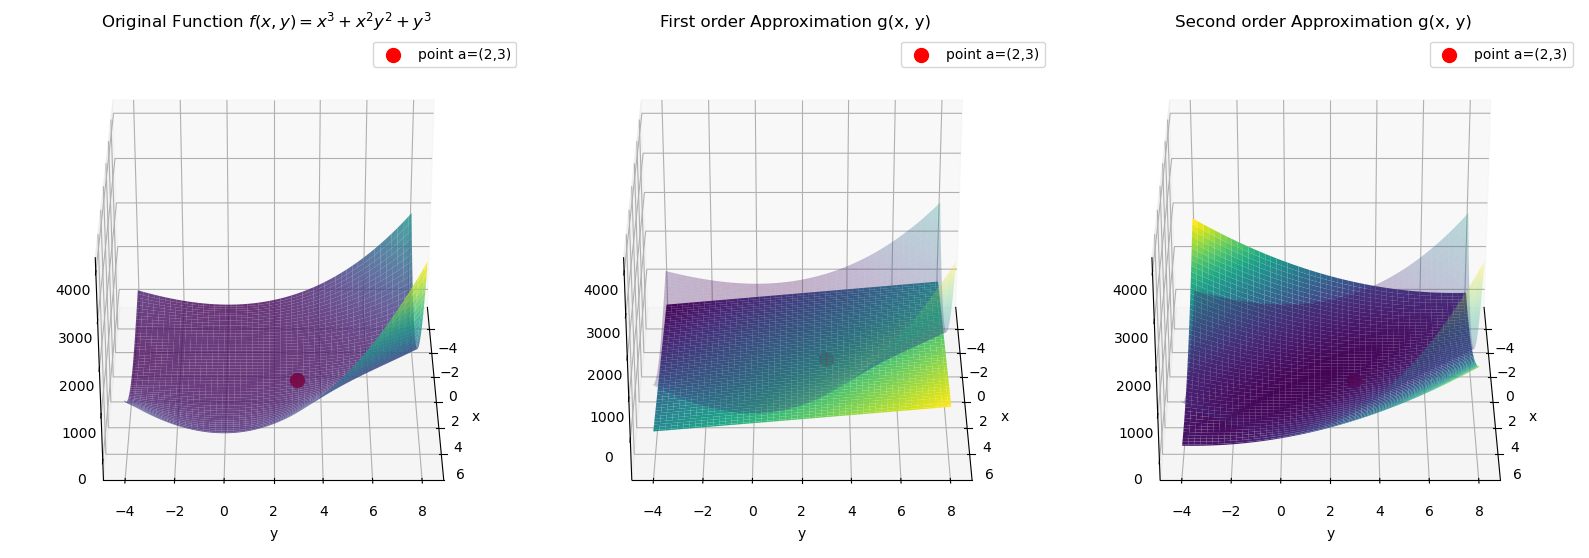

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x, y):
    return x**3 + x**2 * y**2 + y**3

# Gradient of f
def grad_f(x, y):
    g1 = 3 * x**2 + 2*x*y**2
    g2 = 2 * x ** 2 * y + 3*y**2
    G = np.array([g1, g2])
    return G

# Hessian matrix of f
def hessian_f(x, y):
    h11 = 6 * x + 2 * y **2
    h12 = 4*x*y
    h22 = 2 * x ** 2 + 6*y
    H = np.array([[h11, h12],[h12, h22]])
    return H

# Point a 
a = np.array([2, 3])

# Gradient of f at a 
grad_f_at_a = grad_f(a[0], a[1])

# Hessian of f at a 
hessian_f_at_a = hessian_f(a[0], a[1])

# First Order Approximation
def g_1d_grid(X, Y):
    delta_x = X - a[0]
    delta_y = Y - a[1]
    return f(1, 2) + grad_f_at_a[0] * delta_x + grad_f_at_a[1] * delta_y

# Second Order Approximation
def g_2d_grid(X, Y):
    delta_x = X - a[0]
    delta_y = Y - a[1]
    quadratic_term = 0.5 * (hessian_f_at_a[0, 0] * delta_x**2 +
                            hessian_f_at_a[0, 1] * delta_x * delta_y +
                            hessian_f_at_a[1, 0] * delta_x * delta_y +
                            hessian_f_at_a[1, 1] * delta_y**2)
    return f(1, 2) + grad_f_at_a[0] * delta_x + grad_f_at_a[1] * delta_y + quadratic_term

# Create a grid of points for plotting
x_vals = np.linspace(-5, 7, 100)
y_vals = np.linspace(-4, 8, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate f(x, y), g_1d(x, y), and g_2d(x, y) on the grid
Z_f = f(X, Y)
Z_g1d = g_1d_grid(X, Y)
Z_g2d = g_2d_grid(X, Y)

# Plot original function f(x, y), 1D approximation, and 2D approximation
fig = plt.figure(figsize=(16, 8))

# Original function
ax1 = fig.add_subplot(131, projection='3d')
ax1.view_init(azim=0)
ax1.plot_surface(X, Y, Z_f, cmap='viridis', alpha=0.8)
ax1.set_title("Original Function $f(x,y)=x^3 + x^2 y^2 + y^3$")
ax1.scatter(a[0], a[1], f(a[0], a[1]), color='red', s=100,  label=f"point a=({a[0]},{a[1]})")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

# Plot First Order Approximation
ax2 = fig.add_subplot(132, projection='3d')
ax2.view_init(azim=0)
ax2.plot_surface(X, Y, Z_f, cmap='viridis', alpha=0.3)
ax2.plot_surface(X, Y, Z_g1d, cmap='viridis')
ax2.scatter(a[0], a[1], f(a[0], a[1]), color='red', s=100, label=f"point a=({a[0]},{a[1]})" )
ax2.set_title("First order Approximation g(x, y)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.legend()

# Plot Second Order Approximation
ax3 = fig.add_subplot(133, projection='3d')
ax3.view_init(azim=0)
ax3.plot_surface(X, Y, Z_f, cmap='viridis', alpha=0.3)
ax3.plot_surface(X, Y, Z_g2d, cmap='viridis')
ax3.scatter(a[0], a[1], f(a[0], a[1]), color='red', s=100,  label=f"point a=({a[0]},{a[1]})" )
ax3.set_title("Second order Approximation g(x, y)")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.legend()

plt.tight_layout()
plt.legend()
plt.show()


## Example: f(x,y) = cos(x) + cos(y)

Consider Taylor expansion of $f$ around $(a_1,a_2)=(0,0)$

### first order approximation

$$
g(x, y) = f(a_1,a_2) + \nabla f(a_1,a_2)^T (x-a_1, y-a_2) = 2 
$$

### second order approximation

$$
\begin{aligned}
g(x, y) & = f(a_1,a_2) + \nabla f(a_1,a_2)^T (x-a_1, y-a_2) + \frac{1}{2} (x-a_1,y-a_2)^T H(a_1,a_2) (x-a_1,y-a_2) \\
& = f(0,0) + \nabla f(0,0)^T (x, y) + \frac{1}{2} (x,y)^T H(0,0) (x,y) \\
& = 2 + 0 + \frac{1}{2} \begin{pmatrix} x & y \end{pmatrix} \begin{pmatrix} -1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} \\
& = 2 - \frac{1}{2}(x^2 + y^2) \\
\end{aligned}
$$

Where $$ H(0,0) $$ is the Hessian matrix evaluated at the origin. 




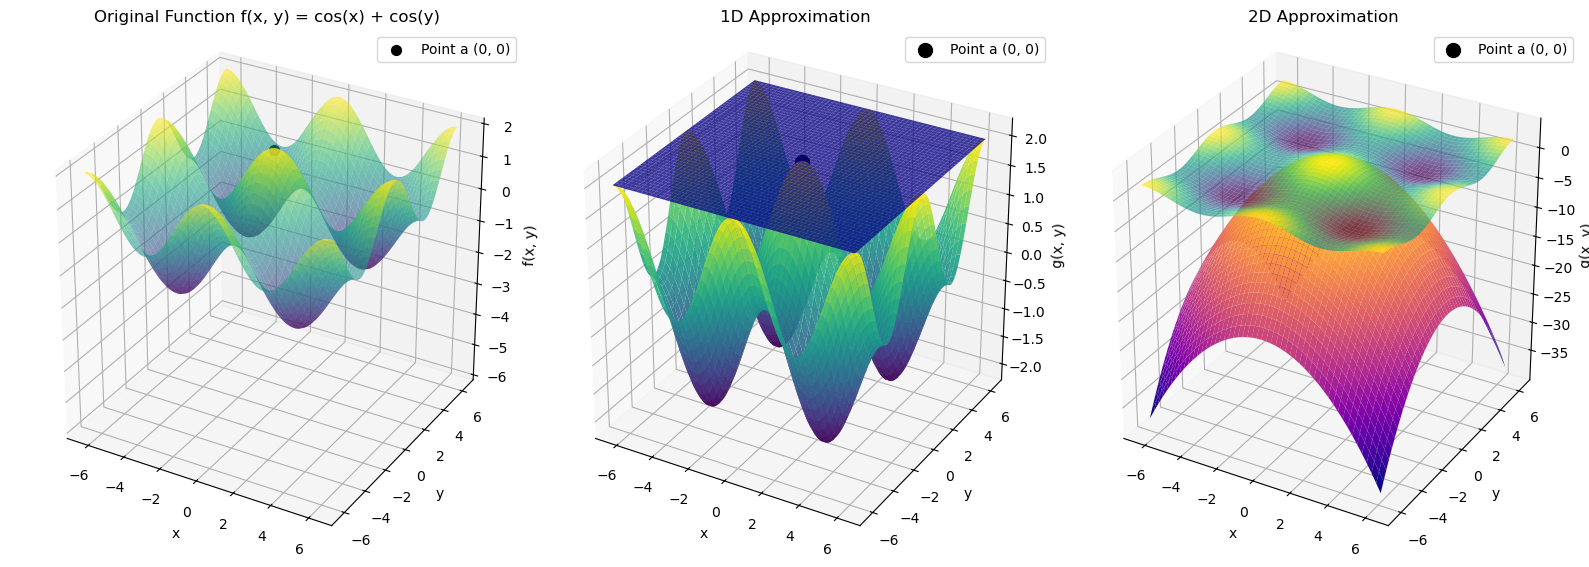

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function: f(x, y) = cos(x) + cos(y)
def f(x, y):
    return np.cos(x) + np.cos(y)

# Gradient of f
def grad_f(x, y):
    g1 = -np.sin(x)  # ∂f/∂x
    g2 = -np.sin(y)  # ∂f/∂y
    G = np.array([g1, g2])
    return G

# Hessian matrix of f
def hessian_f(x, y):
    h11 = -np.cos(x)  # ∂²f/∂x²
    h12 = 0           # ∂²f/∂x∂y
    h22 = -np.cos(y)  # ∂²f/∂y²
    H = np.array([[h11, h12], [h12, h22]])
    return H

# Point for approximation
a = np.array([0, 0])  

# Gradient and Hessian at point a
grad_f_at_a = grad_f(a[0], a[1])
hessian_f_at_a = hessian_f(a[0], a[1])

# 1st order approximation
def g_1d_grid(X, Y):
    delta_x = X - a[0]
    delta_y = Y - a[1]
    return f(a[0], a[1]) + grad_f_at_a[0] * delta_x + grad_f_at_a[1] * delta_y

# 2nd order approximation
def g_2d_grid(X, Y):
    delta_x = X - a[0]
    delta_y = Y - a[1]
    quadratic_term = 0.5 * (hessian_f_at_a[0, 0] * delta_x**2 +
                            hessian_f_at_a[0, 1] * delta_x * delta_y +
                            hessian_f_at_a[1, 0] * delta_x * delta_y +
                            hessian_f_at_a[1, 1] * delta_y**2)
    return f(a[0], a[1]) + grad_f_at_a[0] * delta_x + grad_f_at_a[1] * delta_y + quadratic_term


# Create a grid of points for plotting
x_vals = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_vals = np.linspace(-2*np.pi, 2*np.pi, 1000)
X, Y = np.meshgrid(x_vals, y_vals) # 2d array

# Evaluate f(x, y), g_1d(x, y), and g_2d(x, y) on the grid
Z_f = f(X, Y)
Z_g1d = g_1d_grid(X, Y) # 1d approximation
Z_g2d = g_2d_grid(X, Y) # 2d approximation

# Plot original function f(x, y), 1D approximation, and 2D approximation
fig = plt.figure(figsize=(16, 8))

# Original function
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_f, cmap="viridis", alpha=0.6)
ax1.scatter(a[0], a[1], f(a[0], a[1]), color='black', s=50, label='Point a (0, 0)')  # Point a
ax1.set_title("Original Function f(x, y) = cos(x) + cos(y)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x, y)")
ax1.set_zlim([-6, 2])
ax1.set_box_aspect([1,1,1])
ax1.legend()

# Plot First Order Approximation
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z_f, cmap="viridis", alpha=0.9)
ax2.plot_surface(X, Y, Z_g1d, cmap='plasma', alpha=0.8)
ax2.scatter(a[0], a[1], f(a[0], a[1]), color='black', s=100, label='Point a (0, 0)')  # Point a
ax2.set_title("1D Approximation")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("g(x, y)")
ax1.set_zlim([-6, 2])
ax2.set_box_aspect([1,1,1])
ax2.legend()

# Plot Second Order Approximation
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z_f, cmap='viridis', alpha=0.7)
ax3.plot_surface(X, Y, Z_g2d, cmap="plasma")
ax3.scatter(a[0], a[1], f(a[0], a[1]), color='black', s=100, label='Point a (0, 0)')  # Point a
ax3.set_title("2D Approximation")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("g(x, y)")
ax1.set_zlim([-6, 2])
ax3.set_box_aspect([1,1,1])
ax3.legend()

plt.tight_layout()
plt.show()
